# 1. Hard coded Decision Tree Algorithm

In [1]:
# Follow this link for a detailed Decision Tree algorithm

# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

# 2. Decision Tree (sk-learn)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# 2.1. Decision Tree for regression

In [3]:
# Generate some random data for a regression problem
# X is the input data with one feature, y is the target
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.5 - np.random.rand(16))  # Add some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02551151133113759


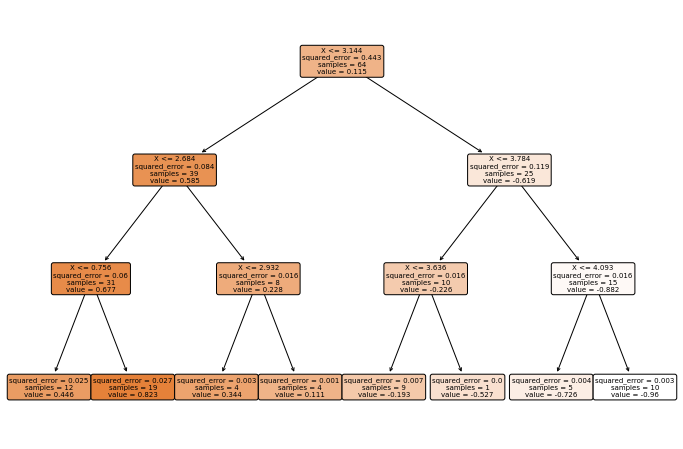

In [4]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=["X"], rounded=True)
plt.show()

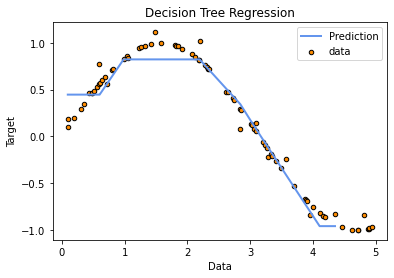

In [5]:
# Plot predictions vs actual data
X_test_sorted = np.sort(X_test, axis=0)
y_test_pred = tree.predict(X_test_sorted)
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test_sorted, y_test_pred, color="cornflowerblue", label="Prediction", linewidth=2)
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 2.2. Decision Tree for classification

In [6]:
# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # Use only sepal length and sepal width for visualization
y = data.target  # Target labels (flower species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.7555555555555555

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        19
  versicolor       0.57      0.62      0.59        13
   virginica       0.62      0.62      0.62        13

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.77      0.76      0.76        45



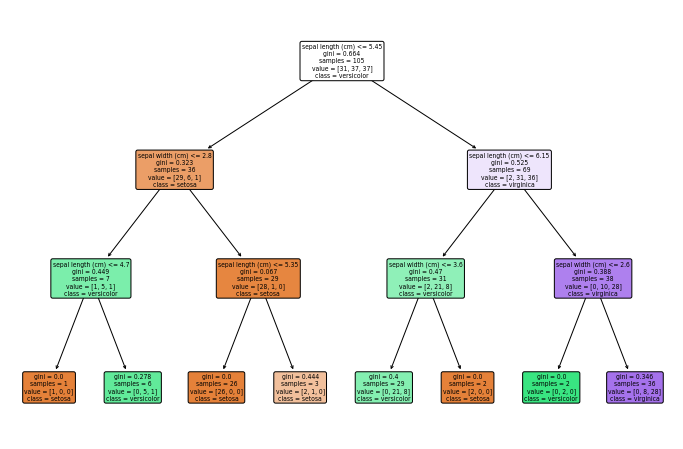

In [7]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=data.feature_names[:2], class_names=data.target_names, rounded=True)
plt.show()

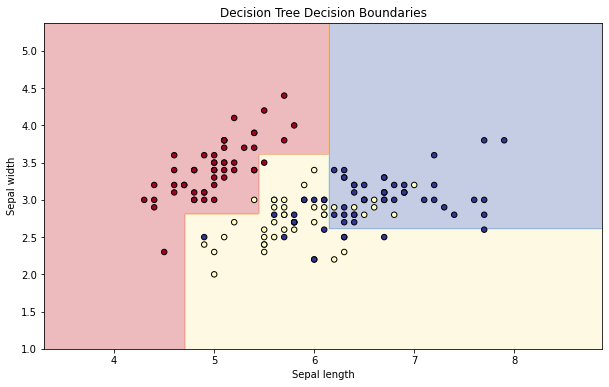

In [8]:
# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class labels for each point in the mesh
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("Decision Tree Decision Boundaries")
plt.show()